In [3]:
% matplotlib inline
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import seaborn as sns

/Users/yukisunami/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/yukisunami/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/yukisunami/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/yukisunami/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/yukisunami/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in l

In [33]:
def make_position_encoding(xp, batch, length, n_units, f=10000):
    assert(n_units%2==0)
    position_block=xp.broadcast_to(
    xp.arange(length)[None, None,: ],
    (batch, n_units // 2, length)).astype('f')
    
    unit_block=xp.broadcast_to(
    xp.arange(n_units // 2)[None, :, None],
    (batch, n_units // 2, length)).astype('f')
    
    rad_block=position_block / (f * 1. ) ** (unit_block / (n_units // 2) )
    sin_block = xp.sin(rad_block)
    cos_block = xp.cos(rad_block)
    print(sin_block.shape, cos_block.shape)
    emb_block = xp.concatenate([sin_block, cos_block], axis=1)
    return emb_block

(1, 256, 1000) (1, 256, 1000)


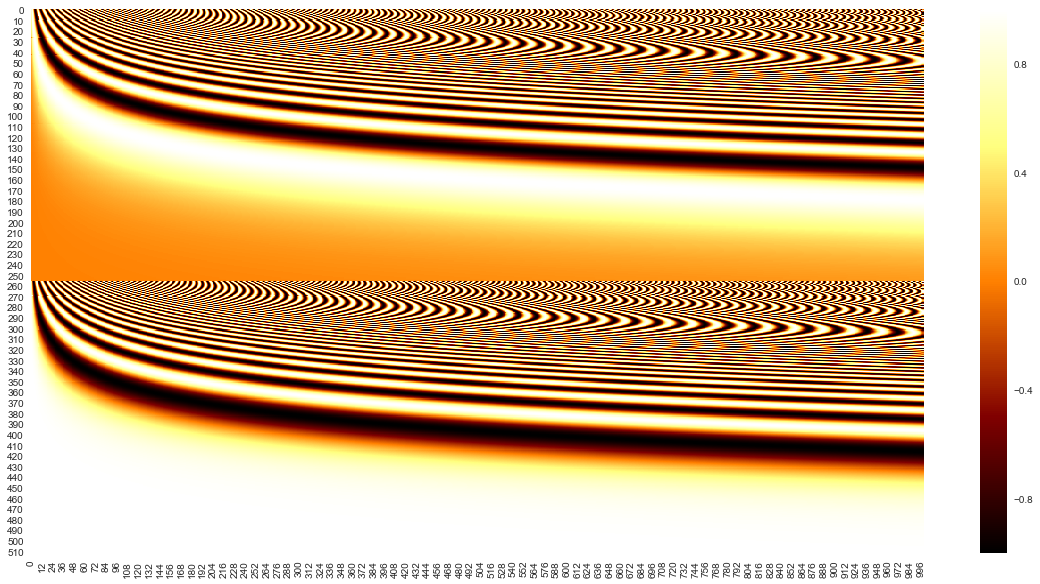

In [47]:
sns.set()
a = make_position_encoding(np, 1, 1000, 512, 10000)[0]
plt.figure(figsize=(20, 10))
sns.heatmap(a, cmap='afmhot')


In [46]:
print(a.shape)
a[:10]

(512, 10)


array([[  0.00000000e+00,   8.41470957e-01,   9.09297407e-01,
          1.41120002e-01,  -7.56802499e-01,  -9.58924294e-01,
         -2.79415488e-01,   6.56986594e-01,   9.89358246e-01,
          4.12118495e-01],
       [  0.00000000e+00,   8.21856201e-01,   9.36414719e-01,
          2.45085254e-01,  -6.57166958e-01,  -9.93854761e-01,
         -4.75221038e-01,   4.52392608e-01,   9.90672708e-01,
          6.76370323e-01],
       [  0.00000000e+00,   8.01961780e-01,   9.58144367e-01,
          3.42781842e-01,  -5.48605561e-01,  -9.98228669e-01,
         -6.44028842e-01,   2.28774801e-01,   9.17357683e-01,
          8.67239118e-01],
       [  0.00000000e+00,   7.81887114e-01,   9.74888206e-01,
          4.33642566e-01,  -4.34205294e-01,  -9.75027084e-01,
         -7.81497598e-01,   6.24831475e-04,   7.82276392e-01,
          9.74748790e-01],
       [  0.00000000e+00,   7.61720419e-01,   9.87046242e-01,
          5.17305672e-01,  -3.16715539e-01,  -9.27709281e-01,
         -8.85421157e-01

In [10]:
n_units=3
batch=3
length=3
np.broadcast_to(np.arange(n_units // 2)[None, :, None],
    (batch, n_units // 2, length))

array([[[0, 0, 0]],

       [[0, 0, 0]],

       [[0, 0, 0]]])

In [23]:
a = np.broadcast_to(np.arange(3)[None, :, None], (5,3,4))
print(a)
print(np.sin(a))

[[[0 0 0 0]
  [1 1 1 1]
  [2 2 2 2]]

 [[0 0 0 0]
  [1 1 1 1]
  [2 2 2 2]]

 [[0 0 0 0]
  [1 1 1 1]
  [2 2 2 2]]

 [[0 0 0 0]
  [1 1 1 1]
  [2 2 2 2]]

 [[0 0 0 0]
  [1 1 1 1]
  [2 2 2 2]]]
[[[ 0.          0.          0.          0.        ]
  [ 0.84147098  0.84147098  0.84147098  0.84147098]
  [ 0.90929743  0.90929743  0.90929743  0.90929743]]

 [[ 0.          0.          0.          0.        ]
  [ 0.84147098  0.84147098  0.84147098  0.84147098]
  [ 0.90929743  0.90929743  0.90929743  0.90929743]]

 [[ 0.          0.          0.          0.        ]
  [ 0.84147098  0.84147098  0.84147098  0.84147098]
  [ 0.90929743  0.90929743  0.90929743  0.90929743]]

 [[ 0.          0.          0.          0.        ]
  [ 0.84147098  0.84147098  0.84147098  0.84147098]
  [ 0.90929743  0.90929743  0.90929743  0.90929743]]

 [[ 0.          0.          0.          0.        ]
  [ 0.84147098  0.84147098  0.84147098  0.84147098]
  [ 0.90929743  0.90929743  0.90929743  0.90929743]]]
